In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Absenteeism_at_work.csv', sep=';')

In [3]:
data.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
categorical_labels = ['ID', 'Reason for absence', 'Month of absence','Day of the week', 'Seasons', 'Education']
continuous_labels = ['Transportation expense', 'Distance from Residence to Work','Service time', 'Age', 
                     'Work load Average/day ', 'Hit target', 'Son','Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']
boolean_labels = ['Disciplinary failure', 'Social drinker', 'Social smoker']

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

st_scaler = StandardScaler()
st_scaler.fit(data[continuous_labels])

OHE = OneHotEncoder()
OHE.fit(data[categorical_labels])

def custom_preprocessing(data):
    categorical_features = pd.DataFrame(OHE.transform(data[categorical_labels]).toarray())
    continuous_features = pd.DataFrame(st_scaler.transform(data[continuous_labels]), columns=continuous_labels)
    bool_features = data[boolean_labels].reset_index(drop=True)
    
    return pd.concat([categorical_features, continuous_features, bool_features], axis=1)

In [7]:
processed_data = custom_preprocessing(data)

In [8]:
processed_data

,0,1,2,3,4,5,6,7,8,9,...,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Disciplinary failure,Social drinker,Social smoker
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.638686,0.893723,0.192850,0.851673,-0.019046,0.775932,-0.219511,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.638686,-0.017234,-0.566240,1.473056,0.975828,1.009438,-0.519767,1,1,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.638686,-0.928191,-0.566240,0.774000,-0.350671,1.009438,-0.369639,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.638686,0.893723,-0.566240,-0.857131,-0.682295,-0.625100,-0.219511,0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.638686,0.893723,0.192850,0.851673,-0.019046,0.775932,-0.369639,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.420423,0.893723,0.192850,0.851673,-0.019046,0.775932,0.080744,0,1,0
736,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.420423,-0.017234,0.192850,0.696327,-0.019046,0.542427,-0.219511,0,0,0
737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.109131,-0.017234,5.506478,1.473056,-0.350671,1.709954,-0.519767,0,1,0
738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.109131,0.893723,0.951940,1.628402,-0.350671,1.943459,-0.519767,0,1,0


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 105)

In [10]:
pca.fit(processed_data)

PCA(n_components=105)

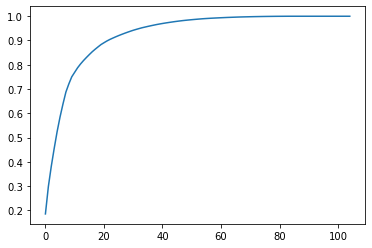

In [11]:
# 차원축소 component 수 생각해보기
plt.plot(pca.explained_variance_ratio_.cumsum())

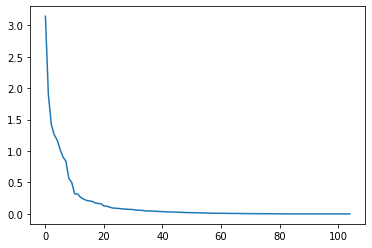

In [12]:
plt.plot(pca.explained_variance_)

In [13]:
# 대략 95%를 목표로 한다면?
pca.explained_variance_ratio_.cumsum()[33]

0.9524753991989445

In [14]:
pca.explained_variance_ratio_.cumsum()[2]

0.3809860335395404

In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne = TSNE()
data_embedded = TSNE(n_components=2).fit_transform(processed_data)

In [17]:
data_embedded.shape

(740, 2)

<AxesSubplot:xlabel='ft1', ylabel='ft2'>

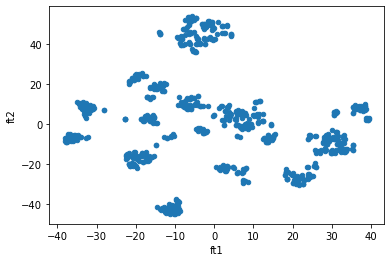

In [18]:
pd.DataFrame(data_embedded, columns=['ft1', 'ft2']).plot(x='ft1', y='ft2', kind='scatter')

# 차원축소 끝나고 이제 클러스터링

In [18]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=5).fit(data_embedded)

In [19]:
# 색을 얼마든지 나눌 수 있었으면 좋겠는데.. 컬러맵에서 하나씩 iterate 시키는 방법은 없으려나
import matplotlib.colors # 색상 생성용

def show_kmean(data, n_clusters=5, alpha=1):
    kmean = KMeans(n_clusters=n_clusters).fit(data)
    kmean_data = pd.DataFrame(data=np.array([data[:, 0],data[:, 1], kmean.labels_]).T, columns=['ft1', 'ft2', 'label'])
    colors = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, n_clusters)]
    for l in set(kmean.labels_):
        color = matplotlib.colors.to_hex(colors[l])
        plt.scatter(x = kmean_data.loc[kmean_data['label']==l, 'ft1'], y = kmean_data.loc[kmean_data['label']==l, 'ft2'], c=color, alpha=alpha)
        plt.scatter(x=kmean.cluster_centers_[l, 0],y=kmean.cluster_centers_[l, 1], marker='^', c=color, edgecolors='k',label=f'{l}', s=100, linewidths=1.5)
        plt.text(x=kmean.cluster_centers_[l, 0], y=kmean.cluster_centers_[l, 1], s=f'{l}', fontsize=15)
    plt.title(f'k-mean clustering, k={n_clusters}')
    plt.show()

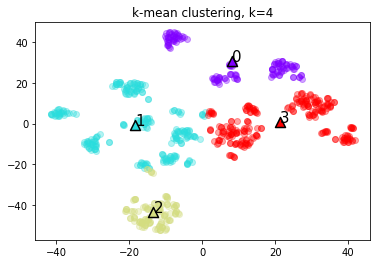

In [20]:
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
show_kmean(data_embedded, 4, 0.35)

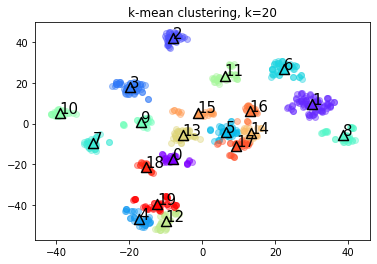

In [23]:
show_kmean(data_embedded, 20, 0.4)

In [24]:
# k-mean clustering iteration에 따른 분류 변화를 움짤로 보고 싶었음 (진화 과정?)

from celluloid import Camera
import matplotlib.animation as animation
import matplotlib.colors

def kmean_anim(data, n_clusters=5, alpha=1, n_iter=300):
    fig = plt.figure()
    camera = Camera(fig)
    ax = fig.add_subplot(111)

    for iternum in range(1, n_iter+1):        
        kmean = KMeans(n_clusters=n_clusters, max_iter=iternum, n_init=1, init='random', random_state=64).fit(data)
        if kmean.n_iter_ < iternum: break # 일찍 수렴했을 경우 끝내기
        
        kmean_data = pd.DataFrame(data=np.array([data[:, 0],data[:, 1], kmean.labels_]).T, columns=['ft1', 'ft2', 'label'])
        colors = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, n_clusters)]
        # scatter plot of clustered items
        for l in set(kmean.labels_):
            color = matplotlib.colors.to_hex(colors[l])
            plt.scatter(x = kmean_data.loc[kmean_data['label']==l, 'ft1'], y = kmean_data.loc[kmean_data['label']==l, 'ft2'], c=color, alpha=alpha)
            plt.scatter(x=kmean.cluster_centers_[l, 0],y=kmean.cluster_centers_[l, 1], marker='^', c=color, edgecolors='k',label=f'{l}', s=100, linewidths=1.5)
            plt.text(x=kmean.cluster_centers_[l, 0], y=kmean.cluster_centers_[l, 1], s=f'{l}', fontsize=15)
        # figure settings
        ttl = plt.text(0.5, 1.01, f'kmean cluster(k={n_clusters}), iter={iternum}', horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes)
        
        plt.draw() # for no error
        
        camera.snap()
    animation = camera.animate()
    animation.save(f'kmean_{n_clusters}-clusters.gif', fps=3)
    

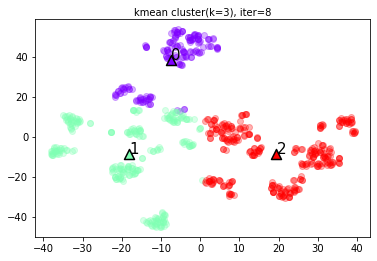

In [92]:
# 애니메이션 만들기 개빡세다...
# ffmpeg 문제가 뜨는 건 그냥... 검색해서 나오는 명령어로 깔아주면 된다
kmean_anim(data_embedded, n_clusters=3, alpha = 0.3, n_iter=20)

In [ ]:
# 다음에 할 것들 : 

# 다른 클러스터링 방법을 이용해서도 시각화 함수 만들기 - 클러스터링 알고리즘 간 비교 시각화, 이론 정리 노트북 하나 만들기.
# 이걸 결정적으로는 어떻게 활용해야 하는 것인지에 대한 결론을 내야 할 듯 - 군집화 이용

# 다른 클러스터링 방법 : 
# - mean shift 
# - gmm 
# - dbscan

In [ ]:
# 군집 평가

## Mean Shift

In [51]:
from sklearn.cluster import estimate_bandwidth, get_bin_seeds

print(estimate_bandwidth(data_embedded))
print(get_bin_seeds(data_embedded, 15))


29.28117408366175
[[ -0.  -0.]
 [-30. -15.]
 [-15. -45.]
 [ 15.   0.]
 [ -0. -45.]
 [ 45.  -0.]
 [-15.  45.]
 [-30.   0.]
 [-15.   0.]
 [ 15. -15.]
 [ 30.  15.]
 [-15. -15.]
 [  0.  30.]
 [ 45. -15.]
 [ -0.  45.]
 [ 15.  30.]
 [ -0. -15.]
 [ 30.  30.]
 [-15.  15.]
 [-45.   0.]
 [ 30.   0.]
 [-30.  15.]
 [  0.  15.]
 [-15.  30.]
 [ 30. -15.]
 [-15. -30.]
 [ 15.  15.]]


In [52]:
kmean = KMeans(n_clusters=100, init='random', random_state=64).fit(data_embedded)
mshift = MeanShift(seeds=kmean.cluster_centers_).fit(data_embedded)

In [132]:
len(set(mshift.labels_))

2

In [120]:
from sklearn.cluster import MeanShift

def show_mshift(data, bw=None, alpha = 0.3, n_iter=300, cluster_all=True):
    # seed= np.random.rand(len(data), 2)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    mshift = MeanShift(max_iter=n_iter, bandwidth=bw, seeds=kmean.cluster_centers_, cluster_all=cluster_all).fit(data)
    mshift_data = pd.DataFrame(data=np.array([data[:, 0],data[:, 1], mshift.labels_]).T, columns=['ft1', 'ft2', 'label'])
    n_labels = len(set(mshift.labels_))
    if cluster_all == False: n_labels = n_labels-1
    colors = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, n_labels)]
    for l in range(n_labels):
        color = matplotlib.colors.to_hex(colors[l])
        plt.scatter(x = mshift_data.loc[mshift_data['label']==l, 'ft1'], y = mshift_data.loc[mshift_data['label']==l, 'ft2'], c=color, alpha=alpha)
        plt.scatter(x=mshift.cluster_centers_[l, 0],y=mshift.cluster_centers_[l, 1], marker='^', c=color, edgecolors='k', s=100, linewidths=1.5)
        plt.text(x=mshift.cluster_centers_[l, 0], y=mshift.cluster_centers_[l, 1], s=f'{l}', fontsize=15)
        
        circle = plt.Circle(mshift.cluster_centers_[l], radius=bw, alpha=0.1, color='gray')
        ax.add_patch(circle)
    if cluster_all == False: 
        plt.scatter(x = mshift_data.loc[mshift_data['label']==-1, 'ft1'], y = mshift_data.loc[mshift_data['label']==-1, 'ft2'], c='gray', alpha=alpha)
    plt.title(f'mean shift clustering, iter={mshift.n_iter_}')
    plt.show()

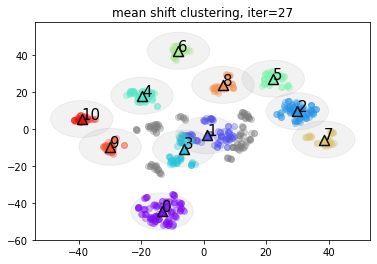

In [121]:
show_mshift(data_embedded, bw=10, cluster_all=False) # bw=10일 땐 12개 군집, bw=20일 땐 5개가 나왔다

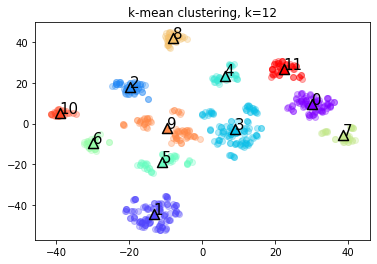

In [40]:
show_kmean(data_embedded, n_clusters=12, alpha=0.3)

In [122]:
def mshift_anim(data, bw=None, alpha = 0.3, n_iter=300, verbose=True, cluster_all=True):
    # seed= np.random.rand(len(data), 2)
    fig = plt.figure()
    camera = Camera(fig)
    ax = fig.add_subplot(111)
    
    for iternum in range(1, n_iter+1):
        mshift = MeanShift(max_iter=iternum, bandwidth=bw, seeds= kmean.cluster_centers_, cluster_all=cluster_all).fit(data)
        if mshift.n_iter_ < iternum: break
        mshift_data = pd.DataFrame(data=np.array([data[:, 0],data[:, 1], mshift.labels_]).T, columns=['ft1', 'ft2', 'label'])
        n_labels = len(set(mshift.labels_))
        if cluster_all == False: n_labels = n_labels-1
        colors = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, n_labels)]
        for l in range(n_labels):
            color = matplotlib.colors.to_hex(colors[l])
            plt.scatter(x = mshift_data.loc[mshift_data['label']==l, 'ft1'], y = mshift_data.loc[mshift_data['label']==l, 'ft2'], c=color, alpha=alpha)
            plt.scatter(x=mshift.cluster_centers_[l, 0],y=mshift.cluster_centers_[l, 1], marker='^', c=color, edgecolors='k', s=100, linewidths=1.5)
            plt.text(x=mshift.cluster_centers_[l, 0], y=mshift.cluster_centers_[l, 1], s=f'{l}', fontsize=15)
            if verbose == True: 
                circle = plt.Circle(mshift.cluster_centers_[l], radius=bw, alpha=0.1, color='gray')
                ax.add_patch(circle)
        if cluster_all == False: 
            plt.scatter(x = mshift_data.loc[mshift_data['label']==-1, 'ft1'], y = mshift_data.loc[mshift_data['label']==-1, 'ft2'], c='gray', alpha=alpha)
        ttl = plt.text(0.5, 1.01, f'mean shift cluster(bw={bw}), iter={iternum}', horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes)
        plt.draw()
        camera.snap()
    animation = camera.animate()
    animation.save(f'mean_shift_bw_{bw}.gif', fps=3)

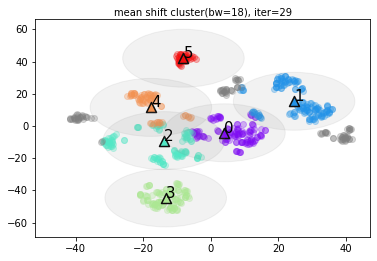

In [125]:
mshift_anim(data_embedded, bw=18, cluster_all=False)

## Gausian Mixture

In [85]:
from sklearn.mixture import GaussianMixture
gmm= GaussianMixture(verbose=2, init_params='random', n_components=3)
gmm.fit(data_embedded)

Initialization 0
Initialization converged: True	 time lapse 0.00798s	 ll -9.00474


GaussianMixture(init_params='random', n_components=3, verbose=2)

In [126]:
gmm.n_iter_

2

In [130]:
gmm.means_

array([[ 0.40720306, -1.07060769],
       [-0.39981655, -2.20985774],
       [ 0.34363845, -2.09875083]])

In [142]:
gmm.weights_

array([0.32964225, 0.33843936, 0.33191839])

In [131]:
def show_gmm(data, n_clusters=5, alpha=1):
    gmm = GaussianMixture(n_components = n_clusters)
    gmm_data = pd.DataFrame(data=np.array([data[:, 0],data[:, 1], gmm.fit_predict(data).astype(int)]).T, columns=['ft1', 'ft2', 'label'])
    colors = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, n_clusters)]
    for l in set(gmm_data['label'].astype(int)):
        color = matplotlib.colors.to_hex(colors[l])
        plt.scatter(x = gmm_data.loc[gmm_data['label']==l, 'ft1'], y = gmm_data.loc[gmm_data['label']==l, 'ft2'], c=color, alpha=alpha)
        plt.scatter(x=gmm.means_[l, 0],y=gmm.means_[l, 1], marker='^', c=color, edgecolors='k',label=f'{l}', s=100, linewidths=1.5)
        plt.text(x=gmm.means_[l, 0], y=gmm.means_[l, 1], s=f'{l}', fontsize=15)
    plt.title(f'gaussian mixture clustering, k={n_clusters}')
    plt.show()

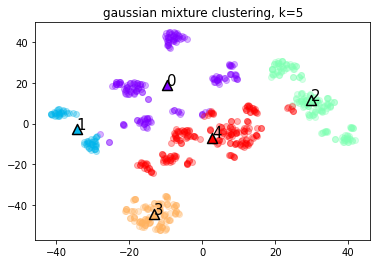

In [132]:
show_gmm(data_embedded, 5, 0.3)

In [140]:
def gmm_anim(data, n_clusters=5, alpha=1, n_iter=300):
    fig = plt.figure()
    camera = Camera(fig)
    ax = fig.add_subplot(111)

    for iternum in range(1, n_iter+1):        
        gmm = GaussianMixture(n_components = n_clusters, max_iter=iternum, random_state=64).fit(data)
        
        if gmm.n_iter_ < iternum: break # 일찍 수렴했을 경우 끝내기
        
        gmm_data = pd.DataFrame(data=np.array([data[:, 0],data[:, 1], gmm.predict(data)]).T, columns=['ft1', 'ft2', 'label'])
        colors = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, n_clusters)]
        # scatter plot of clustered items
        for l in set(gmm_data['label'].astype(int)):
            color = matplotlib.colors.to_hex(colors[l])
            plt.scatter(x = gmm_data.loc[gmm_data['label']==l, 'ft1'], y = gmm_data.loc[gmm_data['label']==l, 'ft2'], c=color, alpha=alpha)
            plt.scatter(x=gmm.means_[l, 0],y=gmm.means_[l, 1], marker='^', c=color, edgecolors='k',label=f'{l}', s=100, linewidths=1.5)
            plt.text(x=gmm.means_[l, 0], y=gmm.means_[l, 1], s=f'{l}', fontsize=15)
        # figure settings
        ttl = plt.text(0.5, 1.01, f'gaussian mixture cluster(k={n_clusters}), iter={iternum}', horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes)
        
        plt.draw() # for no error
        
        camera.snap()
    animation = camera.animate()
    animation.save(f'gaussian_mixture_{n_clusters}-clusters.gif', fps=3)

C:\Users\35896\Anaconda3\envs\2021MLstudy\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
C:\Users\35896\Anaconda3\envs\2021MLstudy\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
C:\Users\35896\Anaconda3\envs\2021MLstudy\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
C:\Users\35896\Anaconda3\envs\2021MLstudy\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not conv

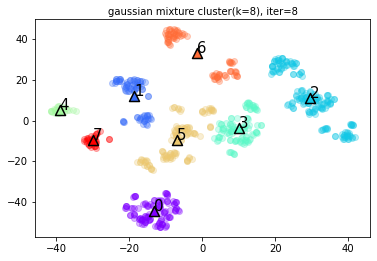

In [141]:
gmm_anim(data_embedded, n_clusters=8, alpha=0.3)